In [1]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import pandas as pd
from pandas.tools.plotting import scatter_matrix
import matplotlib.pyplot as plt
import numpy as np
plt.style.use('seaborn-dark-palette')

#import mpld3

data = pd.DataFrame.from_csv('truth.csv')

data = pd.DataFrame.convert_objects(data,convert_numeric=True)

/usr/local/lib/python2.7/site-packages/ipykernel/__main__.py:13: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.


In [2]:
name_dict = {'pi0':111, 'pi+':211, 'pi-':-211, 'p':2212,
           'p-bar':-2212, 'n':2112, 'n-bar':-2112,
           'K+':321, 'K-':-321, 'K0S':310, 'K0L':130,
           'Lambda0':3122, 'Lambda0-bar':-3122, 'D+':411,
           'D-':-411, 'D0':421, 'D0-bar':-421,
           'LambdaC+':4122, 'LambdaC+-bar':-4122,
           'eta':221, 'rho0':113, 'Υ1(1D)':300553, 
           'B+': 521, 'B-': -521, 'φ(1020)':333, 'K0 (1430)+':10321,
            'K0':311, 'K0-':-311, 'γ':22, 'ρ(770)+':213, 'ρ(770)-':-213}

dict_name = {v: k for k, v in name_dict.items()}

In [3]:
data['name'] = data['ID'].map(dict_name)

In [4]:
#ax = scatter_matrix(data, alpha=0.2, figsize=(16, 9))

In [5]:
kinematics = pd.DataFrame()
kinematics['Px'] = data.Px
kinematics['Py'] = data.Py
kinematics['Pz'] = data.Pz
kinematics['E'] = data.E
kinematics['X'] = data.X
kinematics['Y'] = data.Y
kinematics['Z'] = data.Z
kinematics['T'] = data['T']

In [6]:
kinematics.head()

,Px,Py,Pz,E,X,Y,Z,T
part,,,,,,,,
1,0.1760,0.0000,4.4988,11.5028,0.3619,0.0787,-1.3131,-0.2107
2,0.4054,-0.1093,2.4376,5.8299,0.3619,0.0787,-1.3131,-0.2107
3,-0.2294,0.1093,2.0612,5.6729,0.3619,0.0787,-1.3131,-0.2107
4,2.0084,-1.4483,1.7238,3.1843,0.4060,0.0668,-1.0481,0.4233
5,-1.6030,1.3390,0.7138,2.6456,0.4060,0.0668,-1.0481,0.4233


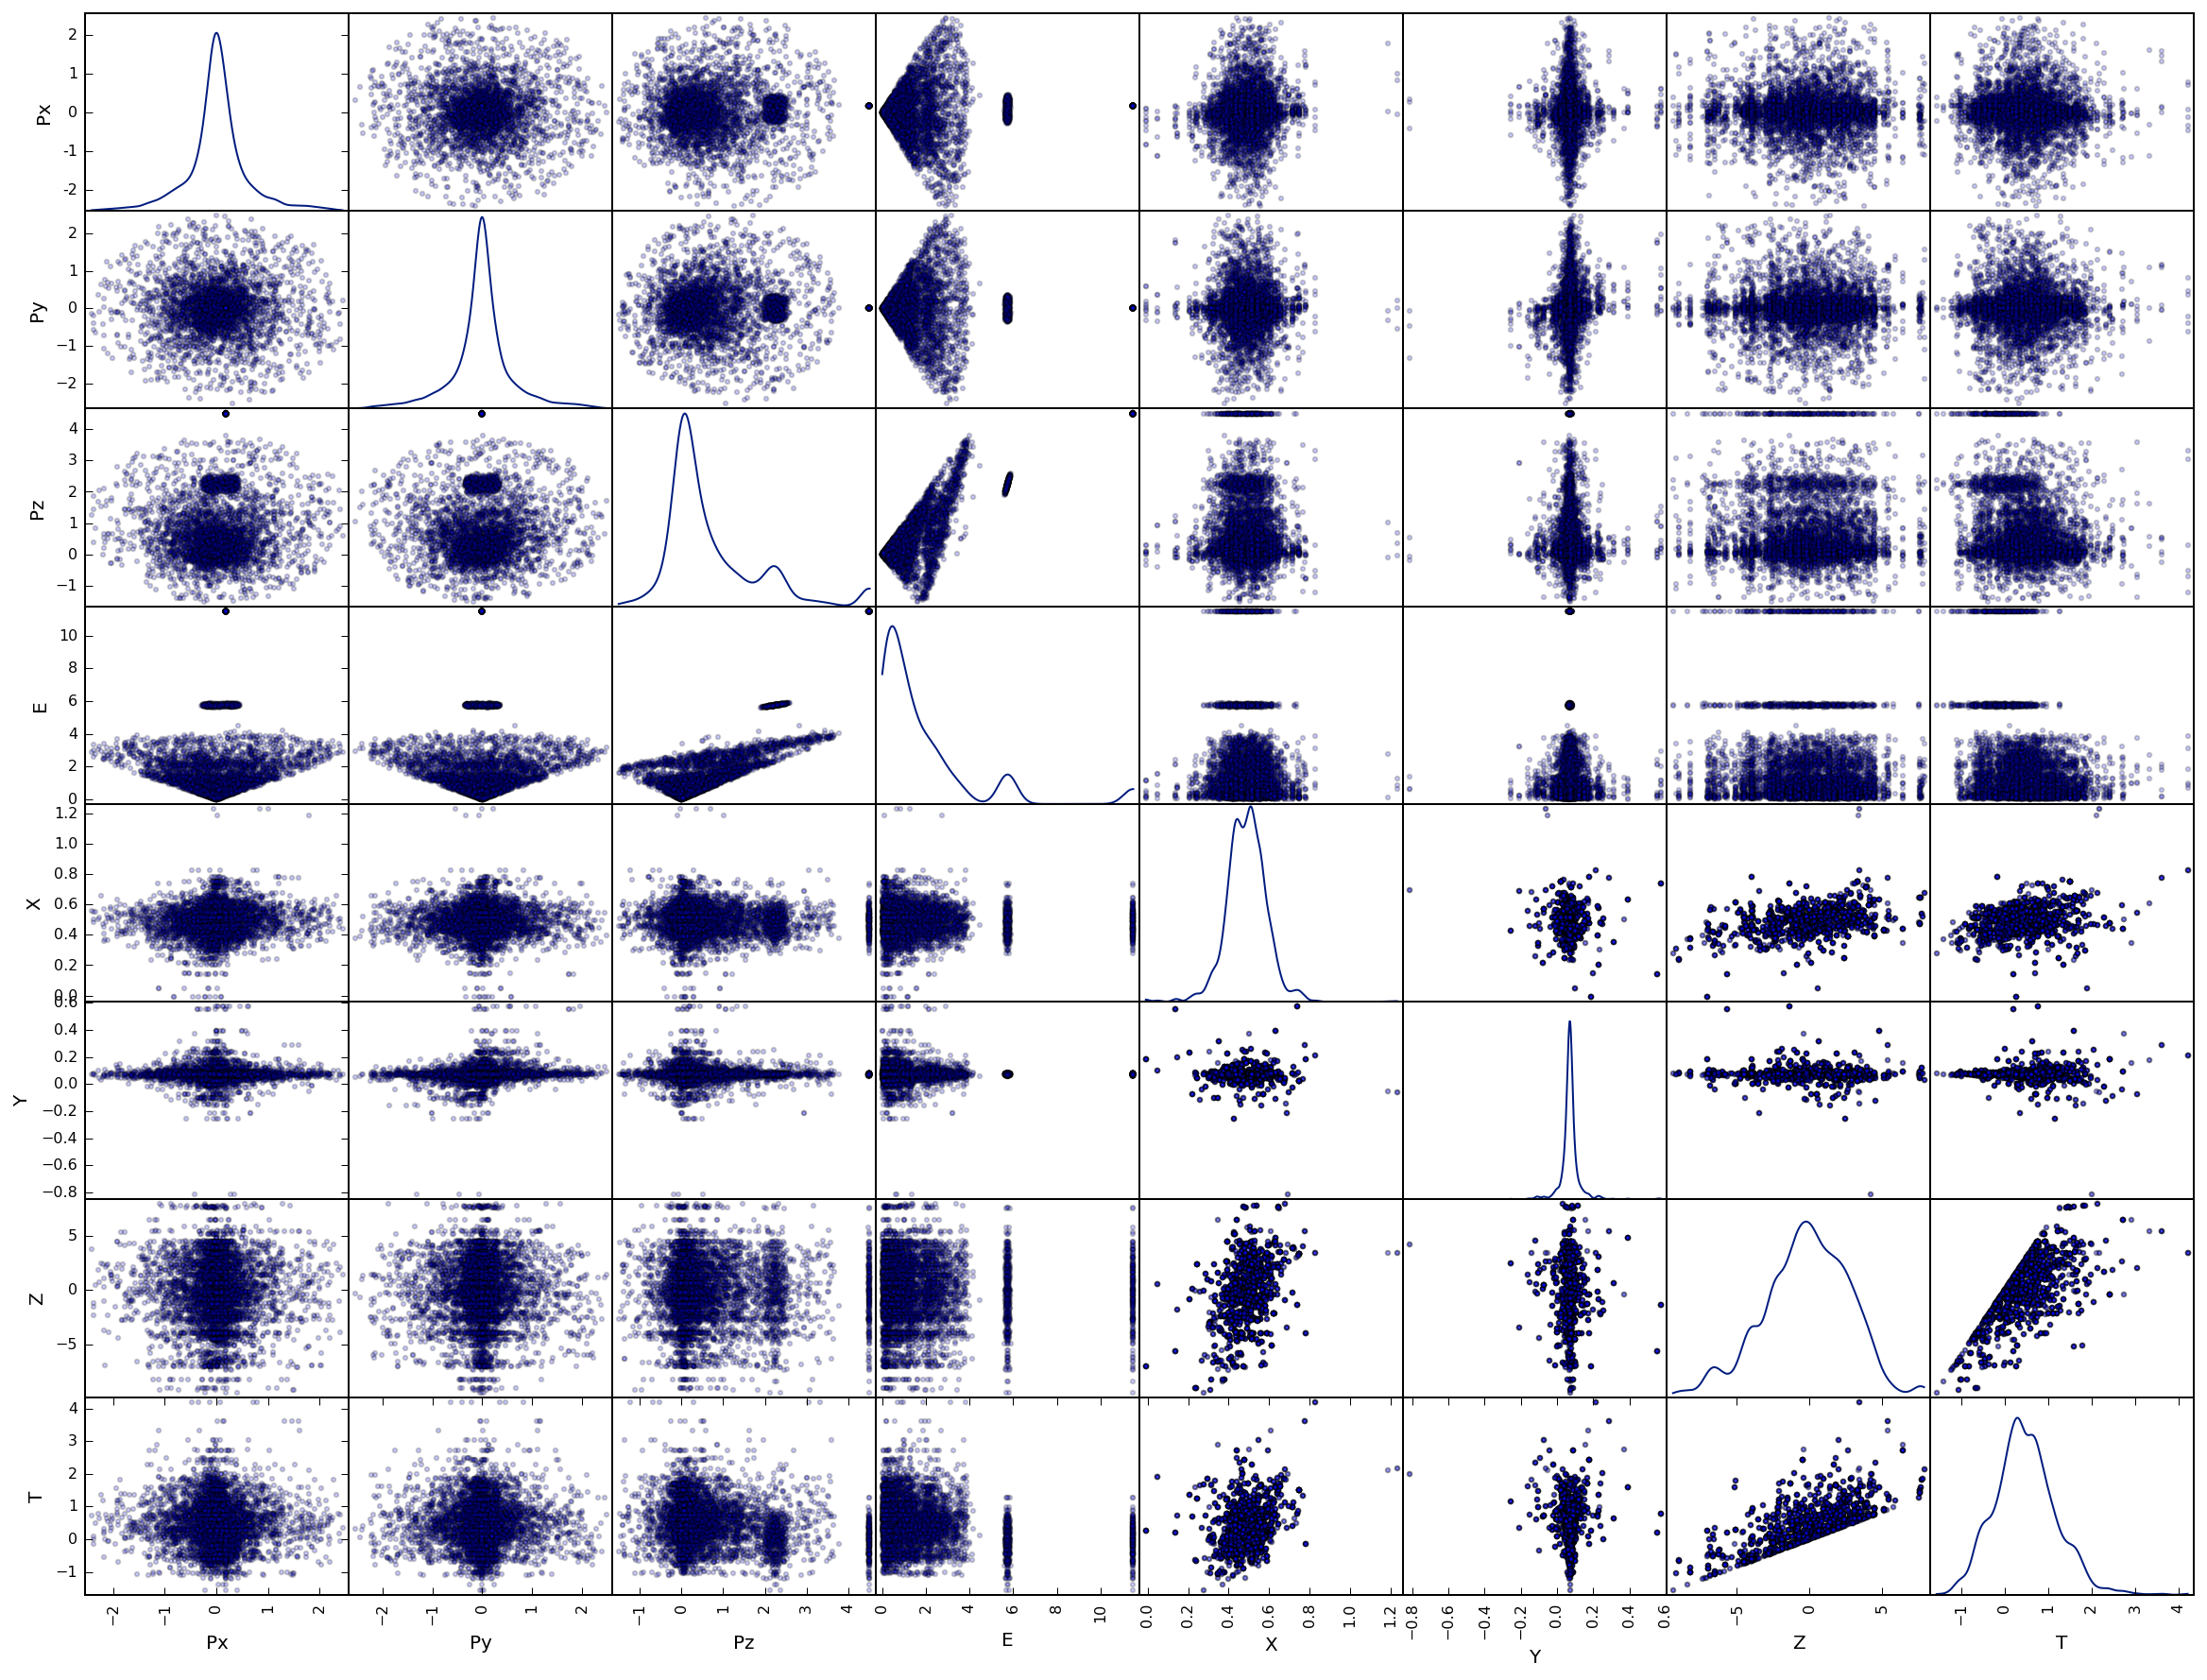

In [7]:
ax = scatter_matrix(kinematics, alpha=0.2, figsize=(20, 15),diagonal='kde')

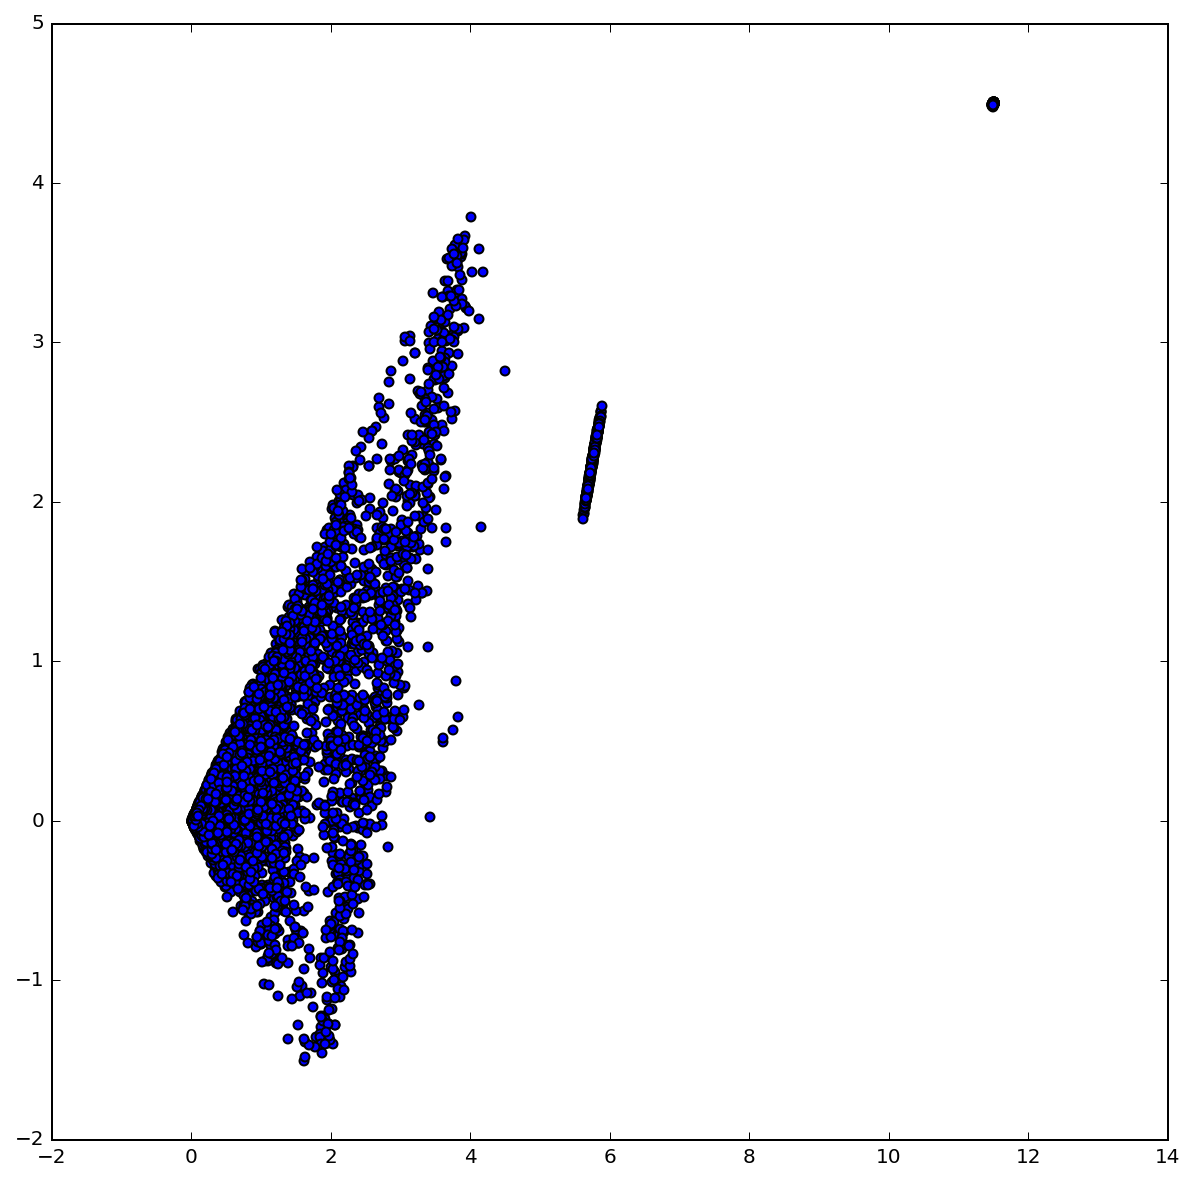

In [8]:
fig, ax = plt.subplots(figsize=(10,10))
ax = plt.scatter(kinematics['E'],kinematics['Pz'])
#mpld3.display(fig)

In [9]:
data.drop(['i1','i2','i3'],inplace=True,axis=1)

In [10]:
data.head()

,event,ID,mother,duaghter1,duaghter2,Px,Py,Pz,E,X,Y,Z,T,name
part,,,,,,,,,,,,,,
1,0,300553,-1,1,2,0.1760,0.0000,4.4988,11.5028,0.3619,0.0787,-1.3131,-0.2107,Υ1(1D)
2,1,521,0,3,4,0.4054,-0.1093,2.4376,5.8299,0.3619,0.0787,-1.3131,-0.2107,B+
3,2,-521,0,9,12,-0.2294,0.1093,2.0612,5.6729,0.3619,0.0787,-1.3131,-0.2107,B-
4,3,333,1,5,6,2.0084,-1.4483,1.7238,3.1843,0.4060,0.0668,-1.0481,0.4233,φ(1020)
5,4,10321,1,7,8,-1.6030,1.3390,0.7138,2.6456,0.4060,0.0668,-1.0481,0.4233,K0 (1430)+


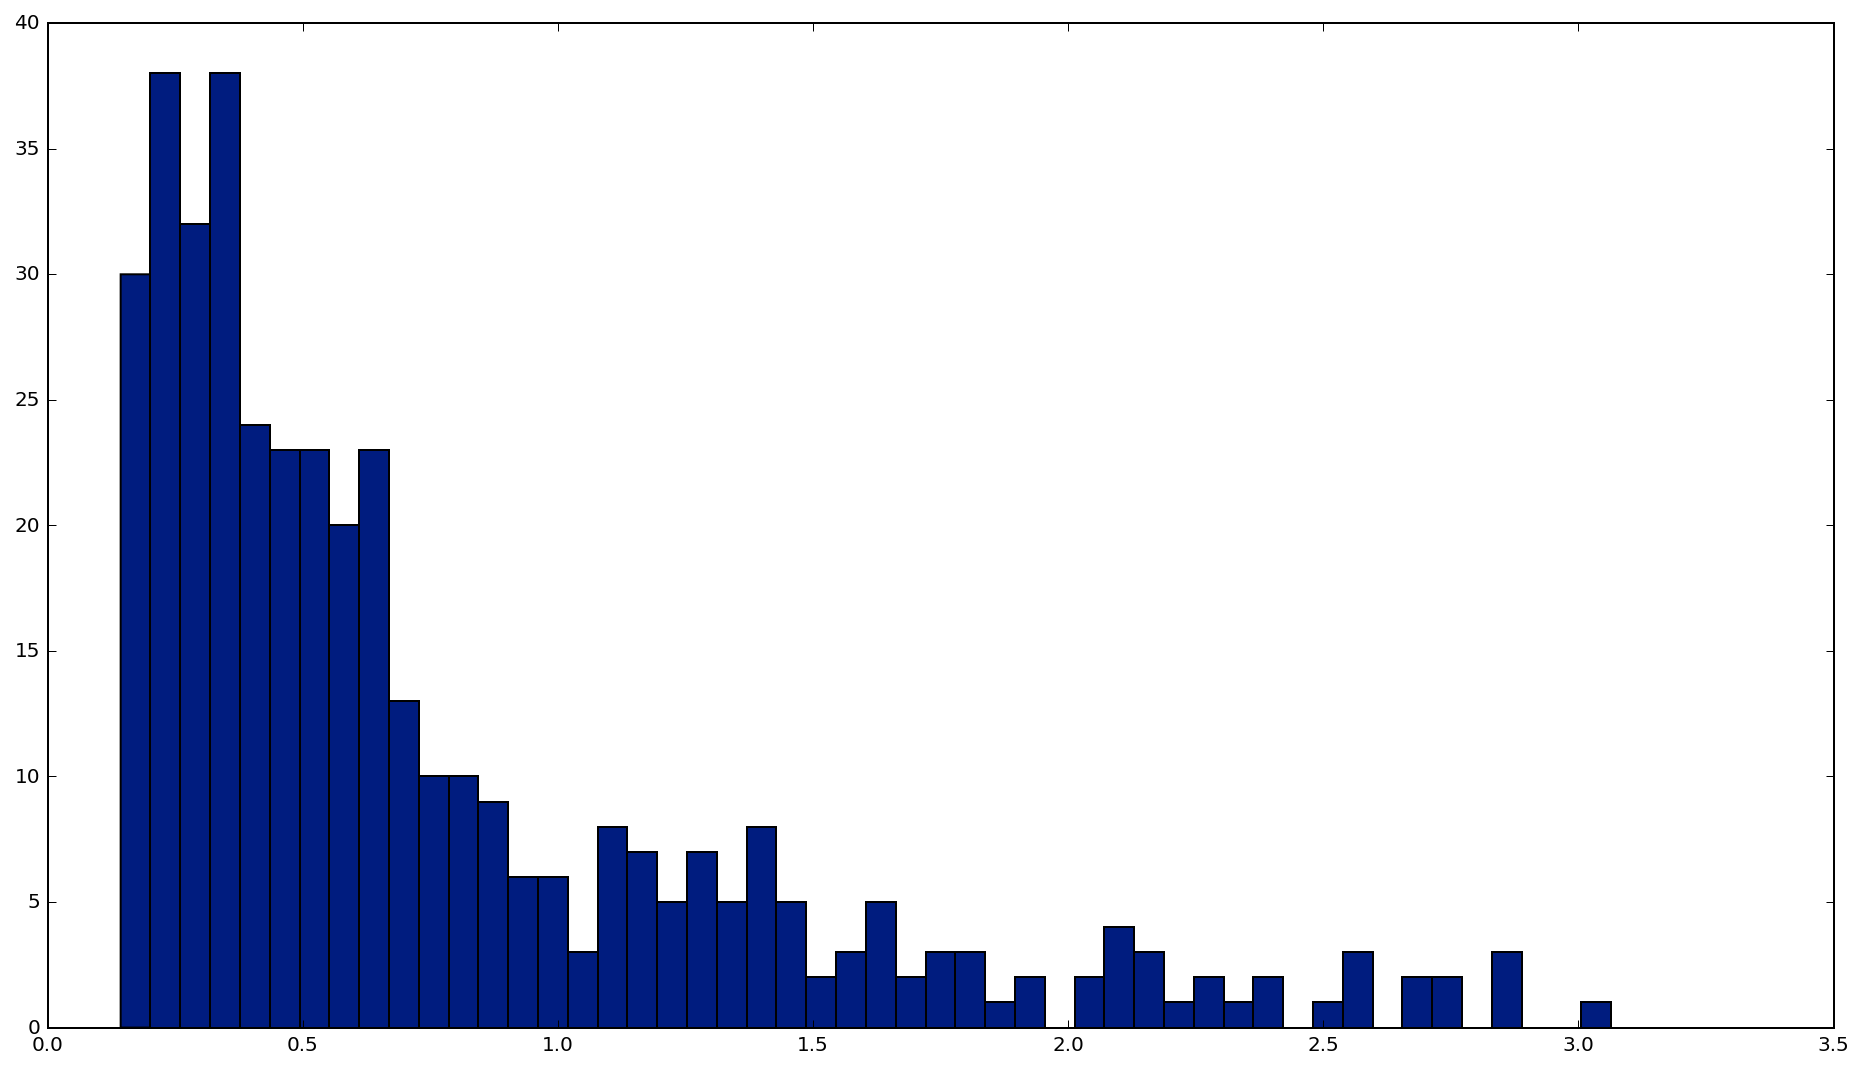

In [11]:
pi_energy = []
fig = plt.figure(figsize=(16,9))
for index, row in data.iterrows():
    if row.ID == 211:
        pi_energy.append(row.E)

pi_energy = np.array(pi_energy)
ax = plt.hist(pi_energy,bins=50)

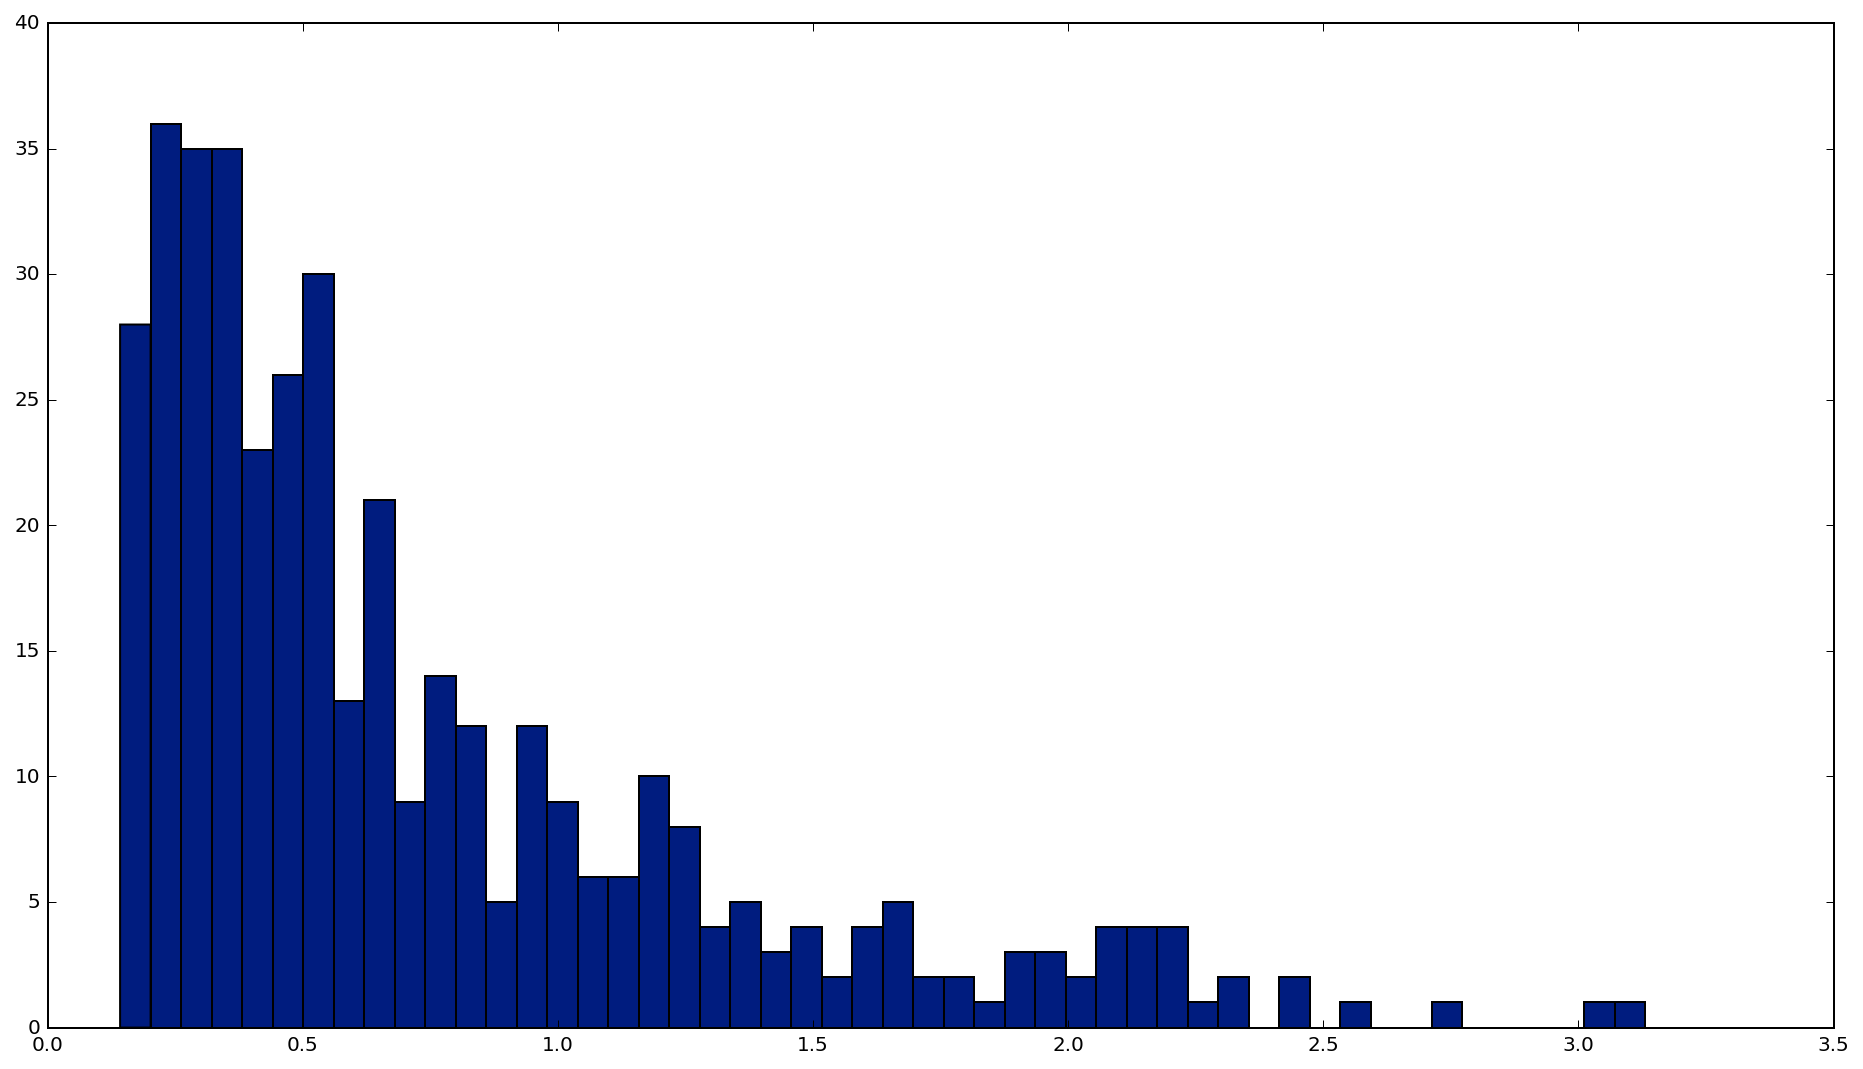

In [12]:
pi_energy = []
fig = plt.figure(figsize=(16,9))
for index, row in data.iterrows():
    if row.ID == -211:
        pi_energy.append(row.E)

pi_energy = np.array(pi_energy)
ax = plt.hist(pi_energy,bins=50)

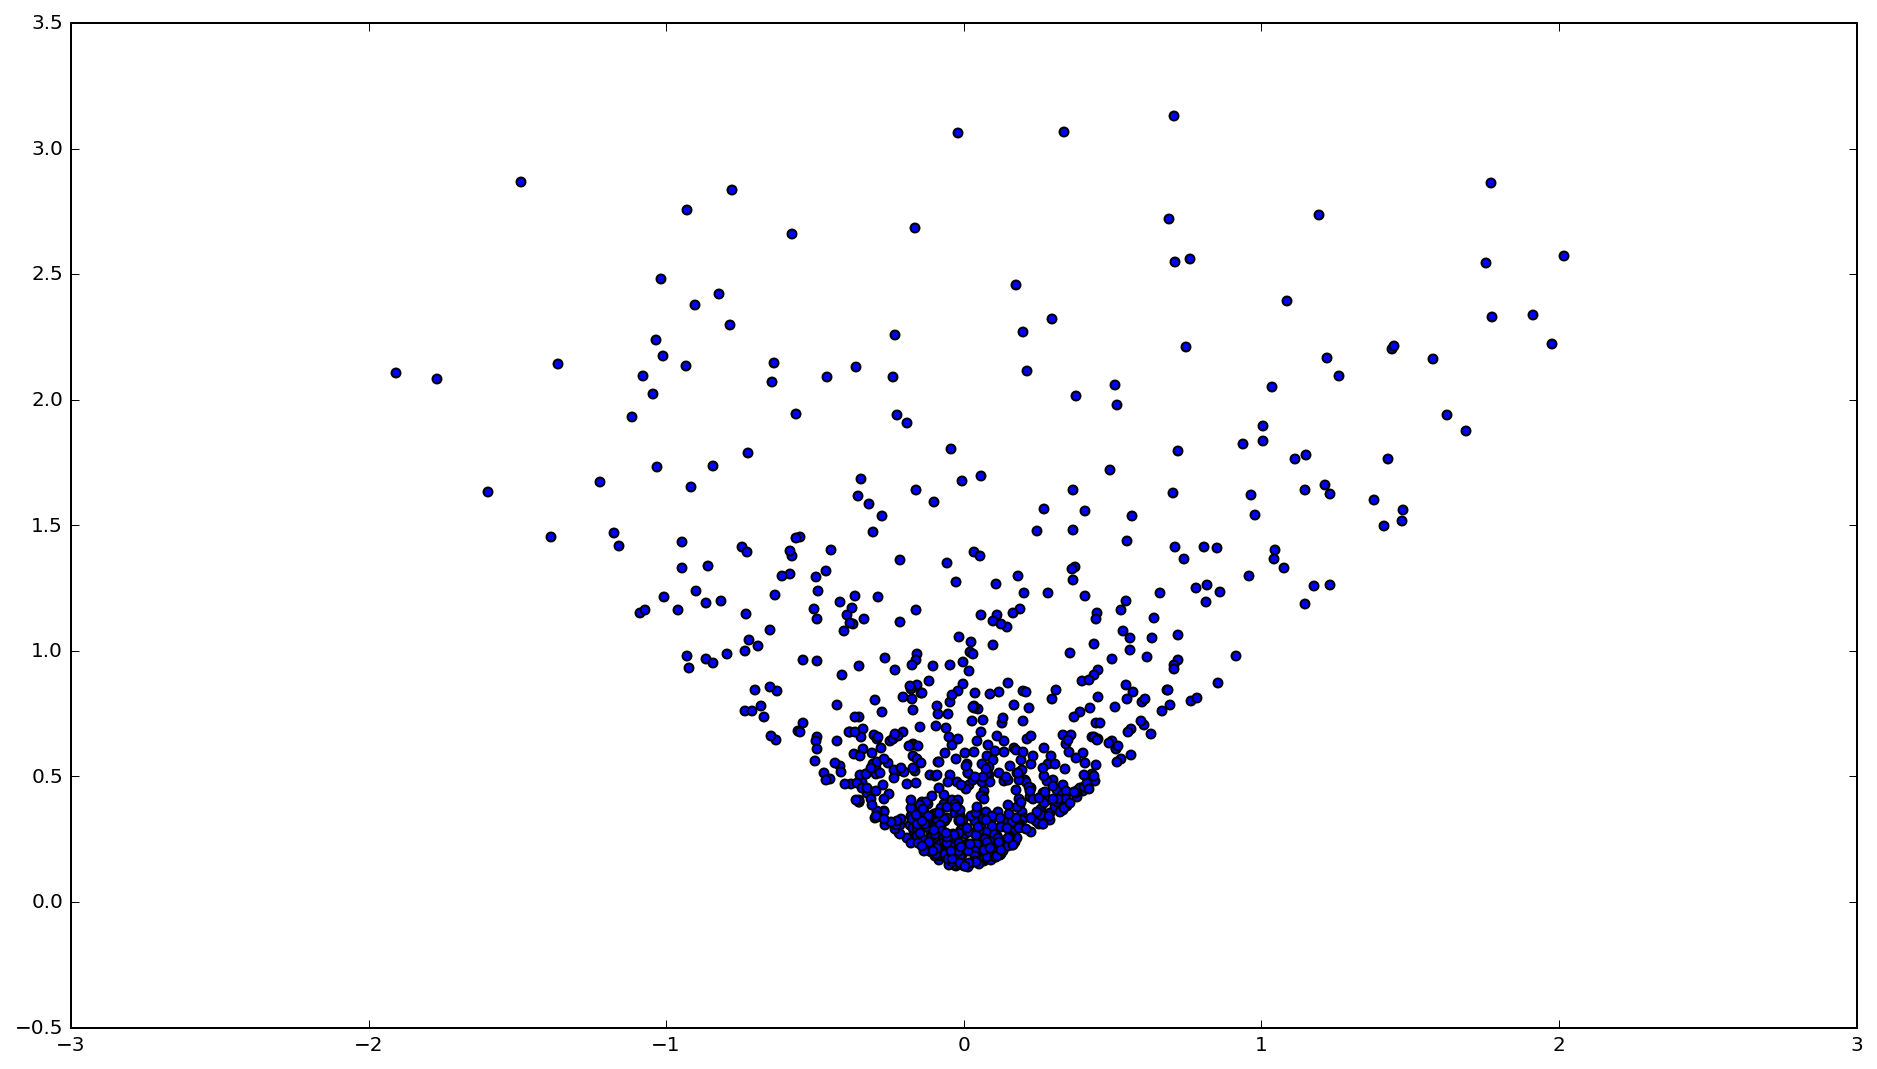

In [13]:
pi_px = []
pi_energy = []
fig = plt.figure(figsize=(16,9))

for index, row in data.iterrows():
    if np.abs(row.ID) == 211:
        pi_px.append(row.Px)
        pi_energy.append(row.E)
        

pi_px = np.array(pi_px)
pi_energy = np.array(pi_energy)

ax = plt.scatter(pi_px,pi_energy)

In [14]:
pions = data[np.abs(data.ID) == 211]
pions['P'] = pions.Px**2 + pions.Py**2 + pions.Pz**2
pions.head()

/usr/local/lib/python2.7/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


,event,ID,mother,duaghter1,duaghter2,Px,Py,Pz,E,X,Y,Z,T,name,P
part,,,,,,,,,,,,,,,
9,8,211,4,40,43,0.0664,0.6113,0.3558,0.7240,0.4060,0.0668,-1.0481,0.4233,pi+,0.504690
16,15,211,9,44,44,-0.0053,-0.1188,0.0424,0.1882,0.3309,0.0930,-1.0224,0.5797,pi+,0.015939
17,16,-211,9,-1,-1,0.0619,-0.1730,0.5005,0.5511,0.3309,0.0930,-1.0224,0.5797,pi-,0.284261
25,24,-211,19,-1,-1,-0.1735,0.2882,0.0289,0.3653,0.2056,0.2287,-0.8738,1.3519,pi-,0.113997
31,30,211,12,56,57,0.2278,0.3669,-0.0052,0.4539,0.3306,0.0936,-1.0315,0.5644,pi+,0.186535


In [15]:
#ax = pions['E'].plot.kde(figsize=(16,9))
#ax = pions['P'].plot.kde(figsize=(16,9))
#ax = pions['E'].plot.hist(figsize=(16,9),bins=80)
#ax = pions['P'].plot.hist(figsize=(16,9),bins=80)

In [16]:
event_start = []
for index, row in data.iterrows():
    if row.mother == -1:
        event_start.append(index)

print event_start

[1, 33, 55, 76, 97, 119, 141, 164, 192, 227, 262, 295, 318, 356, 383, 408, 424, 446, 465, 499, 530, 564, 591, 615, 644, 673, 702, 731, 757, 780, 815, 838, 869, 890, 914, 939, 961, 989, 1009, 1036, 1061, 1089, 1111, 1138, 1168, 1197, 1226, 1250, 1272, 1292, 1315, 1350, 1380, 1406, 1426, 1450, 1475, 1501, 1539, 1573, 1600, 1630, 1648, 1669, 1695, 1721, 1745, 1766, 1791, 1818, 1845, 1881, 1910, 1941, 1964, 1996, 2020, 2040, 2070, 2088, 2121, 2147, 2173, 2201, 2219, 2246, 2285, 2324, 2358, 2379, 2421, 2443, 2467, 2491, 2522, 2548, 2571, 2597, 2616, 2639, 2667, 2701, 2723, 2757, 2788, 2810, 2843, 2868, 2893, 2916, 2949, 2973, 2998, 3027, 3074, 3099, 3120, 3141, 3168, 3206, 3229, 3261, 3298, 3326, 3358, 3391, 3429, 3460, 3491, 3515, 3549, 3571, 3591, 3618, 3647, 3670, 3705, 3739, 3759, 3788, 3806, 3838, 3860, 3886, 3908, 3932, 3955, 3990, 4012, 4059, 4084, 4113, 4139, 4160, 4179, 4202, 4221, 4257, 4290, 4315, 4341, 4367, 4392, 4415, 4457, 4485, 4506, 4529, 4555, 4575, 4613, 4631, 4658, 4694,